# How to use Tensorflow 2

Keras was designed as a high-level or meta API to accelerate the iterative workflow when designing and training deep neural networks with computational backends like TensorFlow, Theano, or CNTK. It has been integrated into TensorFlow in 2017 and is set to become the principal TensorFlow interface with the 2.0 release. You can also combine code from both libraries to leverage Keras’ high-level abstractions as well as customized TensorFlow graph operations.

Please follow the installations instructions in `Installation Guide.md` in the root folder.

## Imports & Settings 

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

import sklearn
from sklearn.datasets import make_circles # To generate the dataset

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D  # 3D plots

import seaborn as sns

In [8]:
# plotting style
sns.set_style('white')
# for reproducibility
np.random.seed(seed=42)

In [9]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


In [10]:
results_path = Path('results')
if not results_path.exists():
    results_path.mkdir()

## Input Data

### Generate random data

The target `y` represents two classes generated by two circular distribution that are not linearly separable because class 0 surrounds class 1.

In [11]:
# dataset params
N = 50000
factor = 0.1
noise = 0.1

In [12]:
# generate data
X, y = make_circles(
    n_samples=N,
    shuffle=True,
    factor=factor,
    noise=noise)

In [13]:
# define outcome matrix
Y = np.zeros((N, 2))
for c in [0, 1]:
    Y[y == c, c] = 1

In [14]:
f'Shape of: X: {X.shape} | Y: {Y.shape} | y: {y.shape}'

'Shape of: X: (50000, 2) | Y: (50000, 2) | y: (50000,)'

### Visualize Data

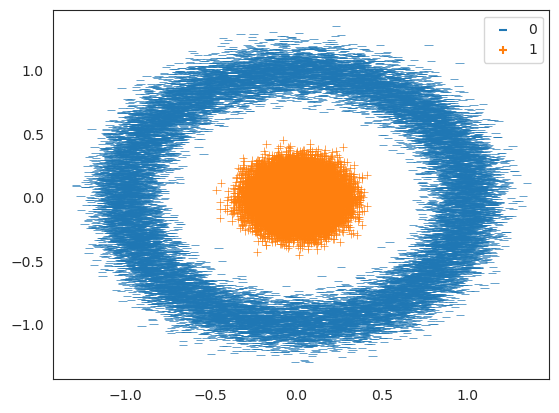

In [15]:
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y,
               style=y,
               markers=['_', '+']);

## Build Keras Model

Keras supports both a slightly simpler Sequential and more flexible Functional API. We will introduce the former at this point and use the Functional API in more complex examples in the following chapters.

To create a model, we just need to instantiate a Sequential object and provide a list with the sequence of standard layers and their configurations, including the number of units, type of activation function, or name. 

### Define Architecture

In [16]:
model = Sequential([
    Dense(units=3, input_shape=(2,), name='hidden'),
    Activation('sigmoid', name='logistic'),
    Dense(2, name='output'),
    Activation('softmax', name='softmax'),
])

2023-02-17 15:59:29.996235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 15:59:29.998123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-17 15:59:29.998254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-17 15:59:29.998315: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/000

The first hidden layer needs information about the number of features in the matrix it receives from the input layer via the input_shape argument. In our simple case, these are just two. Keras infers the number of rows it needs to process during training, through the batch_size argument that we will pass to the fit method below. 

Keras infers the sizes of the inputs received by other layers from the previous layer’s units argument.

Keras provides numerous standard building blocks, including recurrent and convolutional layers, various options for regularization, a range of loss functions and optimizers, and also preprocessing, visualization and logging (see documentation on GitHub for reference). It is also extensible.

The model’s summary method produces a concise description of the network architecture, including a list of the layer types and shapes, and the number of parameters:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 3)                 9         
                                                                 
 logistic (Activation)       (None, 3)                 0         
                                                                 
 output (Dense)              (None, 2)                 8         
                                                                 
 softmax (Activation)        (None, 2)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## Compile Model

Next, we compile the Sequential model to configure the learning process. To this end, we define the optimizer, the loss function, and one or several performance metrics to monitor during training:

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Tensorboard Callback

Keras uses callbacks to enable certain functionality during training, such as logging information for interactive display in TensorBoard (see next section):

In [19]:
tb_callback = TensorBoard(log_dir=results_path / 'tensorboard', 
                          histogram_freq=1, 
                          write_graph=True, 
                          write_images=True)

## Train Model

To train the model, we call its fit method and pass several parameters in addition to the training data:

In [20]:
training=model.fit(X, 
          Y, 
          epochs=50,
          validation_split=.2,
          batch_size=128, 
          verbose=1, 
          callbacks=[tb_callback])

Epoch 1/50


2023-02-17 15:59:33.197610: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f70541dfbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-17 15:59:33.197666: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2023-02-17 15:59:33.224899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-17 15:59:33.480417: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2023-02-17 15:59:33.546944: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 [==============================] - 4s 5ms/step - loss: 0.7148 - accuracy: 0.3791 - val_loss: 0.6924 - val_accuracy: 0.4002
Epoch 2/50
313/313 [==============================] - 1s 5ms/step - loss: 0.6890 - accuracy: 0.6614 - val_loss: 0.6873 - val_accuracy: 0.7286
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 0.6828 - accuracy: 0.7549 - val_loss: 0.6794 - val_accuracy: 0.7713
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 0.6727 - accuracy: 0.7924 - val_loss: 0.6669 - val_accuracy: 0.8138
Epoch 5/50
313/313 [==============================] - 1s 5ms/step - loss: 0.6573 - accuracy: 0.8356 - val_loss: 0.6494 - val_accuracy: 0.8310
Epoch 6/50
313/313 [==============================] - 2s 5ms/step - loss: 0.6368 - accuracy: 0.8551 - val_loss: 0.6265 - val_accuracy: 0.8580
Epoch 7/50
313/313 [==============================] - 1s 5ms/step - loss: 0.6118 - accuracy: 0.8659 - val_loss: 0.5998 - val_accuracy: 0.8649
Epoch 8/50
313/31

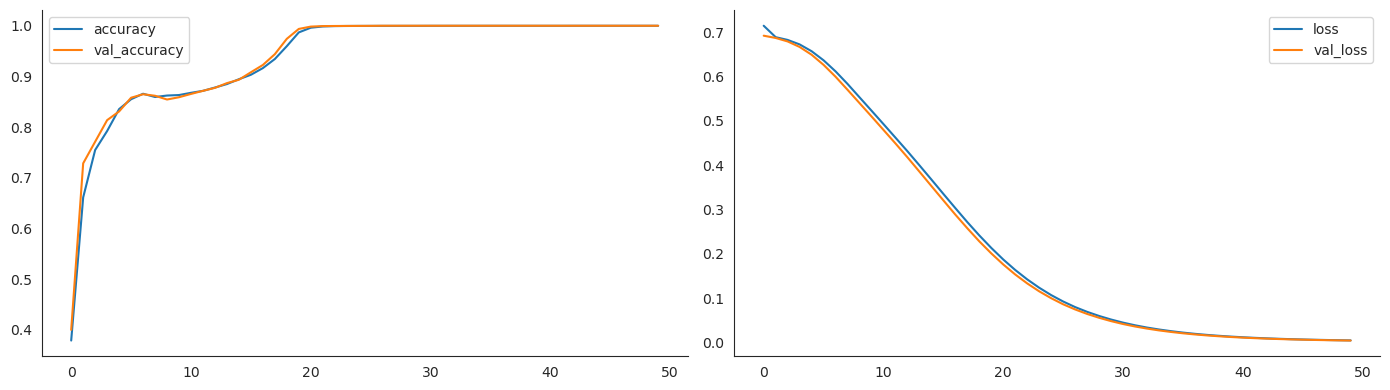

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.DataFrame(training.history)[['accuracy', 'val_accuracy']].plot(ax=axes[0])
pd.DataFrame(training.history)[['loss', 'val_loss']].plot(ax=axes[1])
sns.despine()
fig.tight_layout();

## Get Weights

In [22]:
hidden = model.get_layer('hidden').get_weights()

In [23]:
[t.shape for t in hidden]

[(2, 3), (3,)]

## Plot Decision Boundary

The visualization of the decision boundary resembles the result from the manual network implementation. The training with Keras runs a multiple faster, though.

In [24]:
n_vals = 200
x1 = np.linspace(-1.5, 1.5, num=n_vals)
x2 = np.linspace(-1.5, 1.5, num=n_vals)
xx, yy = np.meshgrid(x1, x2)  # create the grid

In [25]:
X_ = np.array([xx.ravel(), yy.ravel()]).T

In [26]:
y_hat = np.argmax(model.predict(X_), axis=1)

1250/1250 [==============================] - 2s 2ms/step


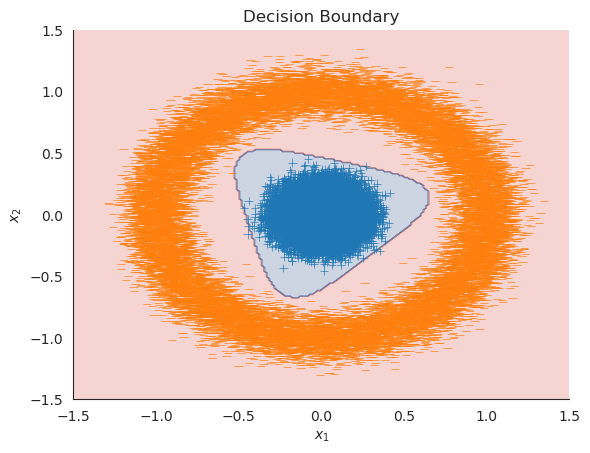

In [27]:
# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([sns.xkcd_rgb["pale red"],
                       sns.xkcd_rgb["denim blue"]])

# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, y_hat.reshape(n_vals, -1), cmap=cmap, alpha=.25)

# Plot both classes on the x1, x2 plane
data = pd.DataFrame(X, columns=['$x_1$', '$x_2$']).assign(Class=pd.Series(y).map({0:'negative', 1:'positive'}))
sns.scatterplot(x='$x_1$', y='$x_2$', hue='Class', data=data, style=y, markers=['_', '+'], legend=False)
sns.despine()
plt.title('Decision Boundary');

In [28]:
%load_ext tensorboard

In [30]:
%tensorboard --logdir results/tensorboard/

Reusing TensorBoard on port 6006 (pid 9415), started 0:01:37 ago. (Use '!kill 9415' to kill it.)